### Análisis exploratorio - EDA

#### Importación de librerías

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Importación de datos e impresión de los cinco primeros registros

In [3]:
# Después de pd.read_csv introducir el enlace correspondiente en raw.
df = pd.read_csv("https://raw.githubusercontent.com/jaimesz11/Ataques_al_corazon-Predicciones_y_analisis/main/Datos/heart.csv?token=ARVDOLJOGMBLXHK4G2QKU2TAWEL5K")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### Medidas estadísticas de las variables de la tabla de datos

In [4]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#### Tipo de valores

In [7]:
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

#### Dimensiones de la tabla

In [5]:
dimensiones = df.shape
print("El dataset está formado por {} filas y {} columnas".format(dimensiones[0], dimensiones[1]))

El dataset está formado por 303 filas y 14 columnas


#### Valores únicos en cada campo 

In [6]:
diccionario = {}
for i in list(df.columns):
    diccionario[i] = df[i].value_counts().shape[0]

pd.DataFrame(diccionario, index = ["Valores únicos"]).transpose()

,Valores únicos
age,41
sex,2
cp,4
trtbps,49
chol,152
fbs,2
restecg,3
thalachh,91
exng,2
oldpeak,40


#### Valores nulos

In [8]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

#### Distinción campos categóricos y continuos

In [9]:
var_categoricas = ["sex", "cp", "fbs", "restecg", "exng", "caa", "thall", "slp"]
var_continuas = ["age", "trtbps", "chol", "thalachh", "oldpeak"]
var_objetivo = ["output"]


#### Detección de outliers 

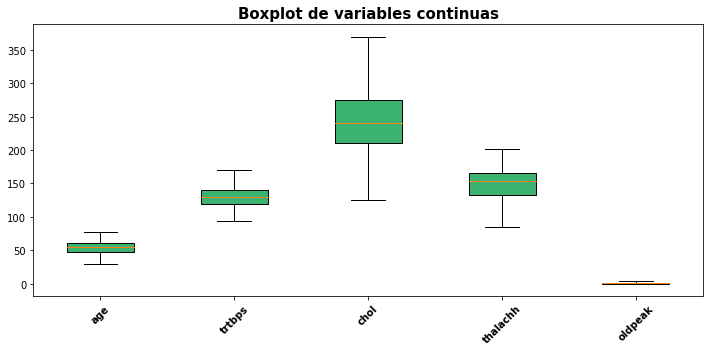

In [45]:
flierprops = dict(marker = 'o', markerfacecolor = 'red', markersize = 5, linestyle='none') # Para los outliers en el boxplot

fig, ax = plt.subplots(figsize = (12, 5))
plot_outliers = ax.boxplot(df[var_continuas], 
                flierprops = flierprops, 
                patch_artist = True,
                boxprops = dict(facecolor='mediumseagreen'))
ax.set_title("Boxplot de variables continuas", 
            color = 'black', 
            fontweight = 'bold', 
            fontsize = '15')
ax.set_xticklabels(var_continuas, 
                  color = 'black', 
                  rotation = 45, 
                  fontweight = 'bold', 
                  fontsize = '10')

plt.show()

#### Tratamiento de outliers

In [15]:
# Hay outliers en las variables "trtbps", "chol", "thalachh" y "oldpeak".
# Se imprimirá a continuación las estadísticas de cada una de estas variables para decidir como se imputan estos outliers:
valores_con_out = ["trtbps", "chol", "thalachh", "oldpeak"]
df[valores_con_out].describe()

,trtbps,chol,thalachh,oldpeak
count,303.000000,303.000000,303.000000,303.000000
mean,131.623762,246.264026,149.646865,1.039604
std,17.538143,51.830751,22.905161,1.161075
min,94.000000,126.000000,71.000000,0.000000
25%,120.000000,211.000000,133.500000,0.000000
50%,130.000000,240.000000,153.000000,0.800000
75%,140.000000,274.500000,166.000000,1.600000
max,200.000000,564.000000,202.000000,6.200000


In [20]:
# trtbps: Presión arterial en reposo (en mmHg)
Q1_trtbps = df['trtbps'].quantile(0.25) # Primer cuartil
Q3_trtbps = df['trtbps'].quantile(0.75) # Tercer cuartil
IQR_trtbps = Q3_trtbps - Q1_trtbps # Rango intercuartílico
low_whisk_trtbps = Q1_trtbps - 1.5 * IQR_trtbps # Bigote inferior
up_whisk_trtbps = Q3_trtbps + 1.5 * IQR_trtbps # Bigote superior

# chol: Colesterol en mg/dl obtenido a través del sensor BMI 
Q1_chol = df['chol'].quantile(0.25) # Primer cuartil
Q3_chol = df['chol'].quantile(0.75) # Tercer cuartil
IQR_chol = Q3_chol - Q1_chol # Rango intercuartílico
low_whisk_chol = Q1_chol - 1.5 * IQR_chol # Bigote inferior
up_whisk_chol = Q3_chol + 1.5 * IQR_chol # Bigote superior

# thalachh - Frecuencia cardíaca máxima alcanzada
Q1_thalachh = df['thalachh'].quantile(0.25) # Primer cuartil
Q3_thalachh = df['thalachh'].quantile(0.75) # Tercer cuartil
IQR_thalachh = Q3_thalachh - Q1_thalachh # Rango intercuartílico
low_whisk_thalachh = Q1_thalachh - 1.5 * IQR_thalachh # Bigote inferior
up_whisk_thalachh = Q3_thalachh + 1.5 * IQR_thalachh # Bigote superior

# oldpeak - Pico anterior 
Q1_oldpeak = df['oldpeak'].quantile(0.25) # Primer cuartil
Q3_oldpeak = df['oldpeak'].quantile(0.75) # Tercer cuartil
IQR_oldpeak = Q3_oldpeak - Q1_oldpeak # Rango intercuartílico
low_whisk_oldpeak = Q1_oldpeak - 1.5 * IQR_oldpeak # Bigote inferior
up_whisk_oldpeak = Q3_oldpeak + 1.5 * IQR_oldpeak # Bigote superior

print("Para trtbps -> bigote inferior: {}, bigote superior: {}".format(low_whisk_trtbps, up_whisk_trtbps))
print("Para chol -> bigote inferior: {}, bigote superior: {}".format(low_whisk_chol, up_whisk_chol))
print("Para thalachh -> bigote inferior: {}, bigote superior: {}".format(low_whisk_thalachh, up_whisk_thalachh))
print("Para oldpeak -> bigote inferior: {}, bigote superior: {}".format(min(df['oldpeak']), up_whisk_oldpeak))


Para trtbps -> bigote inferior: 90.0, bigote superior: 170.0
Para chol -> bigote inferior: 115.75, bigote superior: 369.75
Para thalachh -> bigote inferior: 84.75, bigote superior: 214.75
Para oldpeak -> bigote inferior: 0.0, bigote superior: 4.0


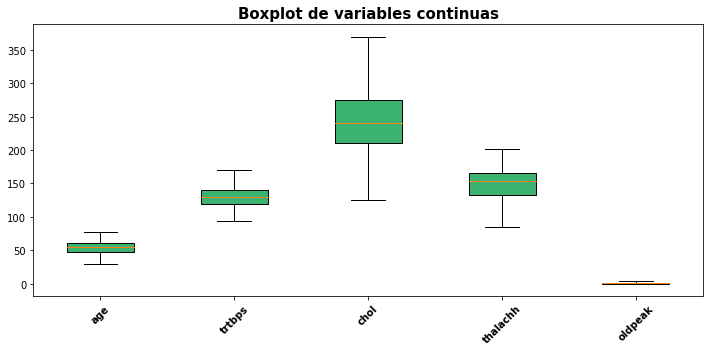

In [44]:
# Todos los outliers por encima o por debajo se imputarán como el valor del bigote superior o inferior según corresponda en cada una de las variables.
# Posteriormente se dibujará de nuevo los boxplots para comprobar si los outliers han desaparecido.
df['trtbps'] = np.where(df['trtbps'] > up_whisk_trtbps, up_whisk_trtbps, df['trtbps'])
df['chol'] = np.where(df['chol'] > up_whisk_chol, up_whisk_chol, df['chol'])
df['thalachh'] = np.where(df['thalachh'] < low_whisk_thalachh, low_whisk_thalachh, df['thalachh'])
df['oldpeak'] = np.where(df['oldpeak'] > up_whisk_oldpeak, up_whisk_oldpeak, df['oldpeak'])


flierprops = dict(marker = 'o', markerfacecolor = 'red', markersize = 5, linestyle='none') # Para los outliers en el boxplot

fig, ax = plt.subplots(figsize = (12, 5))
plot_outliers = ax.boxplot(df[var_continuas], 
                flierprops = flierprops, 
                patch_artist = True,
                boxprops = dict(facecolor='mediumseagreen'))
ax.set_title("Boxplot de variables continuas", 
            color = 'black', 
            fontweight = 'bold', 
            fontsize = '15')
ax.set_xticklabels(var_continuas, 
                  color = 'black', 
                  rotation = 45, 
                  fontweight = 'bold', 
                  fontsize = '10')

plt.show()

# Como se puede observar, ya no habría outliers.

#### Distribución de los valores de las variables categóricas

<AxesSubplot:xlabel='slp', ylabel='count'>

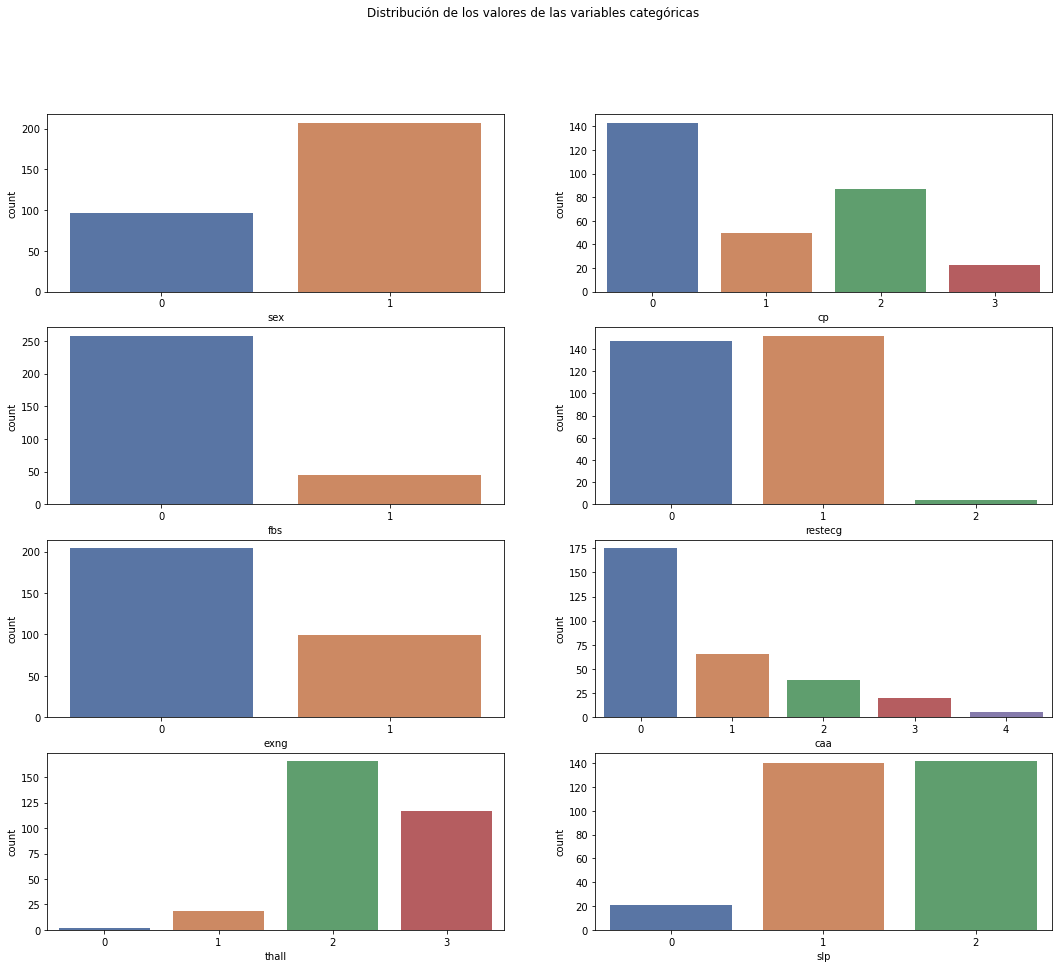

In [49]:
fig, axs = plt.subplots(4, 2, figsize = (18, 15))

fig.suptitle('Distribución de los valores de las variables categóricas')

sns.countplot(x = var_categoricas[0], data = df, palette = 'deep', ax = axs[0, 0])
sns.countplot(x = var_categoricas[1], data = df, palette = 'deep', ax = axs[0, 1])
sns.countplot(x = var_categoricas[2], data = df, palette = 'deep', ax = axs[1, 0])
sns.countplot(x = var_categoricas[3], data = df, palette = 'deep', ax = axs[1, 1])
sns.countplot(x = var_categoricas[4], data = df, palette = 'deep', ax = axs[2, 0])
sns.countplot(x = var_categoricas[5], data = df, palette = 'deep', ax = axs[2, 1])
sns.countplot(x = var_categoricas[6], data = df, palette = 'deep', ax = axs[3, 0])
sns.countplot(x = var_categoricas[7], data = df, palette = 'deep', ax = axs[3, 1])
